# NSL Notebook 08

## Exercise 08.2.1

In [2]:
######                        #######
##  IMPORT DEFAULT PKGS and VARS   ##
######                        #######

from default import *

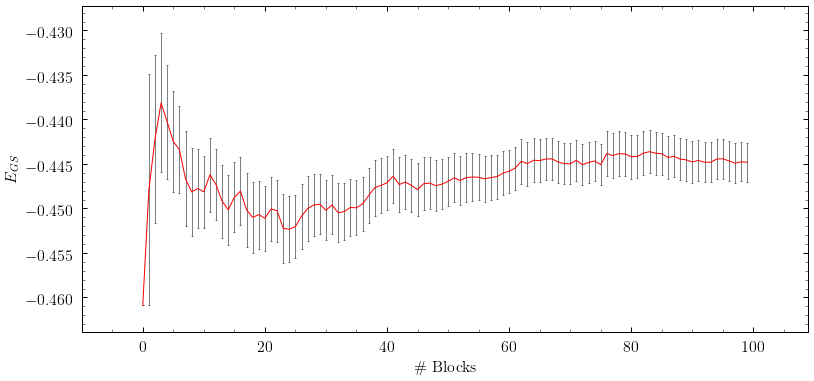

In [89]:
fig, ax = plt.subplots()

df = pd.read_csv('E-gs-blk.csv', header=None, names=['mean','mean_err']);
df["mean"].plot.line(yerr=df["mean_err"], color='r', ecolor='gray', capthick=0.5, ax=ax);

ax.set_ylabel('$E_{GS}$')
ax.set_xlabel("\# Blocks");

## Exercise 08.2.2

In [4]:
# Theoretical values
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2
hbar = 1
m = 1
a = 6
N = 1000 # number of iterations
# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)
# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2
CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal,
# and k<0 for diagonals below the main diagonal
# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)
# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)
# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)
# Theoretical values

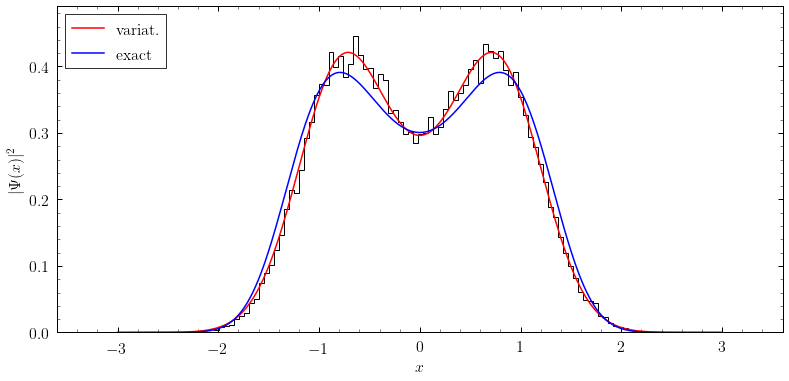

In [34]:
fig, ax = plt.subplots()

df_x = pd.read_csv('x.out', header=None, names=['v'])
ax.hist(df_x['v'], 100, density=True, histtype='step');

mu = 0.786
sigma = 0.432
x = np.linspace(-3,3,1000)
psi2_var = np.sqrt(2)*(np.exp(2*mu*x/sigma**2) + 2*np.exp(mu*x/sigma**2) + 1)*np.exp(-x*(mu + x/2)/sigma**2)/(4*np.sqrt(np.pi)*sigma*(np.exp(mu**2/(2*sigma**2)) + 1))
psi2_teo = (psi[0])**2

ax.plot(x, psi2_var, '-r', lw=1.5, label='variat.');
ax.plot(x, psi2_teo, '-b', lw=1.5, label='exact');

ax.legend();
ax.set_ylabel('$|\\Psi(x)|^2$', fontsize='medium');
ax.set_xlabel('$x$', fontsize='medium');

## Exercise 08.3.1

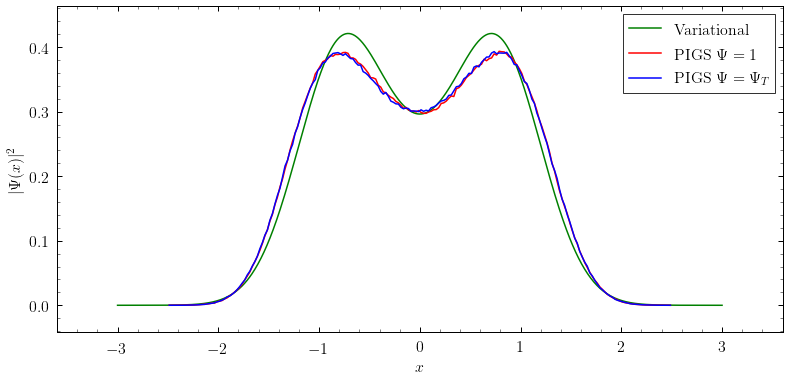

In [38]:
fig, ax = plt.subplots()

dfpt = pd.read_csv('psi2-trivial.tsv', header=None, sep=' ', names=['x','p','e'])
dfpt = dfpt[100:-100]
dfpa = pd.read_csv('psi2-ansatz.tsv', header=None, sep=' ', names=['x','p','e'])
dfpa = dfpa[100:-100]

ax.plot(x, psi2_var, '-g', lw=1.5, label='Variational');
ax.plot(dfpt['x'], dfpt['p'], ls='-', lw=1.5, c='r', label='PIGS $\Psi=1$');
ax.plot(dfpa['x'], dfpa['p'], ls='-', lw=1.5, c='b', label='PIGS $\Psi=\Psi_{T}$');

ax.legend();
ax.set_ylabel('$|\\Psi(x)|^2$', fontsize='medium');
ax.set_xlabel('$x$', fontsize='medium');

## Exercise 08.3.2

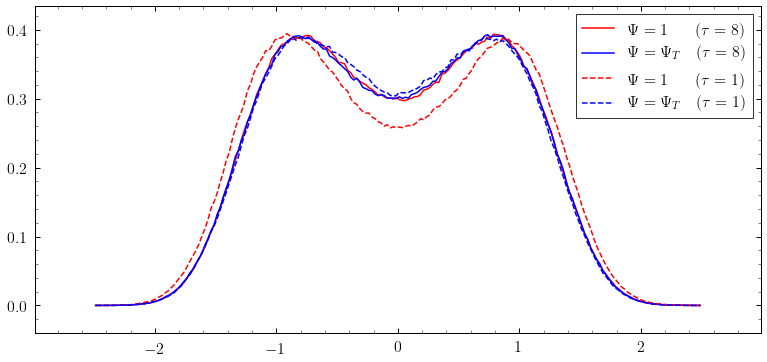

In [76]:
fig, ax = plt.subplots()

dfpt = pd.read_csv('psi2-trivial.tsv', header=None, sep=' ', names=['x','p','e'])
dfpt = dfpt[100:-100]
dfpt1 = pd.read_csv('psi2-trivial-1.tsv', header=None, sep=' ', names=['x','p','e'])
dfpt1 = dfpt1[100:-100]
dfpa = pd.read_csv('psi2-ansatz.tsv', header=None, sep=' ', names=['x','p','e'])
dfpa = dfpa[100:-100]
dfpa1 = pd.read_csv('psi2-ansatz-1.tsv', header=None, sep=' ', names=['x','p','e'])
dfpa1 = dfpa1[100:-100]

ax.plot(dfpt['x'], dfpt['p'], ls='-', lw=1.5, c='r', label='$\Psi=1 \quad\;\;\, (\\tau=8)$');
ax.plot(dfpt1['x'], dfpt1['p'], ls='--', lw=1.5, c='r', label='$\Psi=1 \quad\;\;\, (\\tau=1)$');
ax.plot(dfpa['x'], dfpa['p'], ls='-', lw=1.5, c='b', label='$\Psi=\Psi_{T} \quad (\\tau=8)$');
ax.plot(dfpa1['x'], dfpa1['p'], ls='--', lw=1.5, c='b', label='$\Psi=\Psi_{T} \quad (\\tau=1)$');

ax.legend();